# An Analysis of Seoul Bike Sharing Demand: The Data Science Perspective

## Supporting Notebook

## By Ho Yin, Tam

## Analysis: Data Preparation

Import the libraries.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

 Load and display the seoul bike sharing data.

In [66]:
bikesharing = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')
bikesharing.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Check missing value.

In [67]:
bikesharing.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Check the data types of each column.

In [68]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Create a new column 'Date (YY/MM/DD)' with 'datetime' data type using 'Date' column and append to the last column for future data processing.

In [69]:
bikesharing["Date (YY/MM/DD)"] = pd.to_datetime(bikesharing['Date'], format='%d/%m/%Y')
bikesharing["Date (YY/MM/DD)"] = bikesharing["Date (YY/MM/DD)"].astype('datetime64[ns]')
print('The data type of Date column:', bikesharing["Date"].dtype)
print('The data type of Date (YY/MM/DD) column:',bikesharing["Date (YY/MM/DD)"].dtype)
bikesharing

The data type of Date column: object
The data type of Date (YY/MM/DD) column: datetime64[ns]


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date (YY/MM/DD)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30


Extract the year-month, year, month and day from the 'Date (YY/MM/DD)' column and assign them to new column.

Create a new column to distinguish if the day is weekday or weekend.

In [70]:
bikesharing['Year-Month'] = bikesharing["Date (YY/MM/DD)"].dt.to_period('M')
bikesharing['Year'] = bikesharing["Date (YY/MM/DD)"].dt.year
bikesharing['Month'] = bikesharing["Date (YY/MM/DD)"].dt.month
bikesharing['Day'] = bikesharing["Date (YY/MM/DD)"].dt.day
bikesharing['Weekday'] = bikesharing["Date (YY/MM/DD)"].dt.day_name().apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday')
bikesharing

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date (YY/MM/DD),Year-Month,Year,Month,Day,Weekday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017-12,2017,12,1,Weekday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017-12,2017,12,1,Weekday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017-12,2017,12,1,Weekday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017-12,2017,12,1,Weekday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017-12,2017,12,1,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,2018-11,2018,11,30,Weekday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,2018-11,2018,11,30,Weekday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,2018-11,2018,11,30,Weekday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,2018-11,2018,11,30,Weekday


Generate a basic statistics summary table to check if abnormal data appears.

In [72]:
bikesharing.describe().drop(columns = {'Year', 'Month', 'Day'}).T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Generate a table for histogram by dropping the columns that are not numerical data or irrelevant.

In [73]:
bikesharing_histogram = bikesharing.drop(columns = {'Hour', 'Date', 'Seasons', 'Holiday', 'Functioning Day', 'Date (YY/MM/DD)', 'Year-Month', 'Year', 'Month', 'Day', 'Weekday'})
bikesharing_histogram

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


Create histogram by using the bikesharing_histogram table.

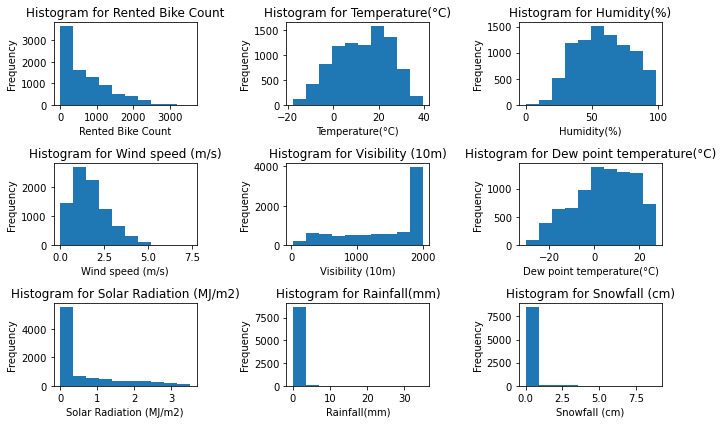

In [93]:
fig, axes = plt.subplots(3,3,figsize=(10,6))
axes = axes.flatten()
for i, column in enumerate(bikesharing_histogram):
    axes[i].hist(bikesharing_histogram[column], bins=10)
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Trend analysis (Question 1): What is the trend of shared bike rentals from 1st December 2017 to 30th November 2018?

Group the data based on the same Year and month using 'Year-Month' column. Change the PeriodDtype to timestamp.

In [75]:
bikesharing_groupbysamemonth = bikesharing.groupby('Year-Month').sum().reset_index()
bikesharing_groupbysamemonth['Year-Month'] = bikesharing_groupbysamemonth['Year-Month'].dt.to_timestamp()
bikesharing_groupbysamemonth

,Year-Month,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day
0,2017-12-01,185330,8556,-1435.0,41534,1292.9,991189,-7696.3,151.69,34.8,276.0,1500648,8928,11904
1,2018-01-01,150006,8556,-2933.7,35773,1393.2,1086156,-10351.9,168.70,8.5,190.0,1501392,744,11904
2,2018-02-01,151833,7728,-1118.7,30142,1466.9,1045987,-8771.8,323.68,27.6,68.6,1356096,1344,9744
3,2018-03-01,380594,8556,5985.1,44116,1429.8,850395,-201.4,446.41,51.5,0.0,1501392,2232,11904
4,2018-04-01,524227,8280,9322.6,39320,1429.9,956065,1814.8,513.19,130.3,0.0,1452960,2880,11160
5,2018-05-01,707088,8556,13499.4,46343,1279.4,932265,7483.7,561.24,222.0,0.0,1501392,3720,11904
6,2018-06-01,896887,8280,16658.5,45085,1206.6,896336,10638.7,602.59,171.5,0.0,1452960,4320,11160
7,2018-07-01,734460,8556,20656.4,50181,1081.9,1144630,15308.9,561.10,185.6,0.0,1501392,5208,11904
8,2018-08-01,651887,8556,21379.9,48213,1265.1,1274888,15452.7,517.16,202.6,0.0,1501392,5952,11904
9,2018-09-01,673612,8280,15479.1,43704,1118.9,1308094,9293.9,470.96,68.5,0.0,1452960,6480,11160


Create a line plot to show the trend of shared bike rentals from 1st December 2017 to 30th November 2018.

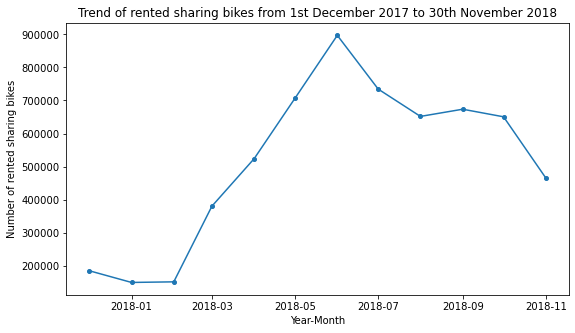

In [76]:
plt.figure(figsize = (9, 5))
plt.plot(bikesharing_groupbysamemonth['Year-Month'], bikesharing_groupbysamemonth['Rented Bike Count'], marker='o', markersize = 4, linestyle='-')
plt.title('Trend of rented sharing bikes from 1st December 2017 to 30th November 2018')
plt.xlabel("Year-Month")
plt.ylabel('Number of rented sharing bikes')
plt.show()

### Trend analysis (Question 2): Are there differences in shared bike demand in different seasons, holidays, functioning days and weekdays?

Using line plot to visualize the total rented bike count over hours from 1st December 2017 to 30th November 2018.

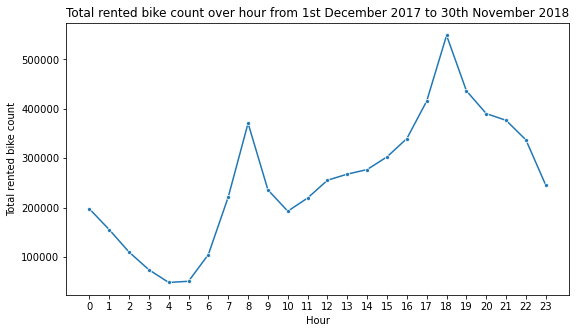

In [77]:
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', estimator = 'sum', data = bikesharing, marker = 'o', markersize = 4, ci = None)
plt.title('Total rented bike count over hour from 1st December 2017 to 30th November 2018')
plt.xlabel('Hour')
plt.ylabel('Total rented bike count')
plt.xticks(bikesharing['Hour'].unique())
plt.show()

Using line plot to visualize the average rented bike count over hours in different seasons from 1st December 2017 to 30th November 2018.

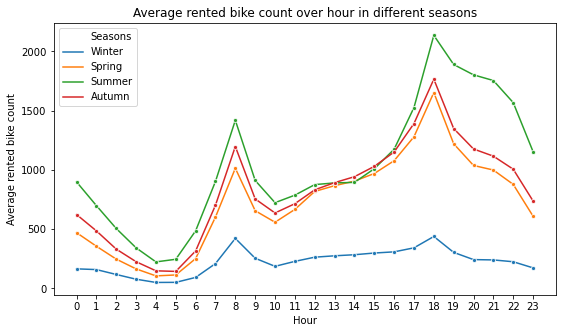

In [78]:
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', data = bikesharing, hue = 'Seasons', marker = 'o', markersize = 4, ci = None)
plt.title('Average rented bike count over hour in different seasons')
plt.xlabel('Hour')
plt.ylabel('Average rented bike count')
plt.xticks(bikesharing['Hour'].unique())
plt.show()

Using line plot to visualize the average rented bike count over hours in different holidays from 1st December 2017 to 30th November 2018.

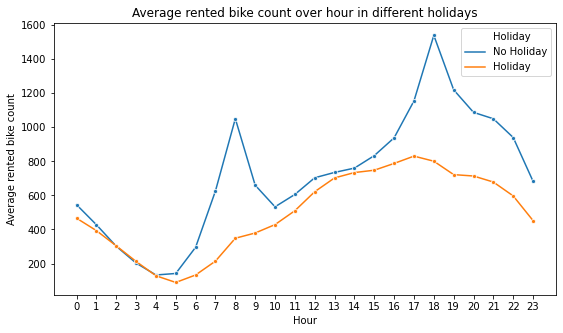

In [79]:
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', data = bikesharing, hue = 'Holiday', marker = 'o', markersize = 4, ci = None)
plt.title('Average rented bike count over hour in different holidays')
plt.xlabel('Hour')
plt.ylabel('Average rented bike count')
plt.xticks(bikesharing['Hour'].unique())
plt.show()

Using line plot to visualize the average rented bike count over hours in different functioning day from 1st December 2017 to 30th November 2018.

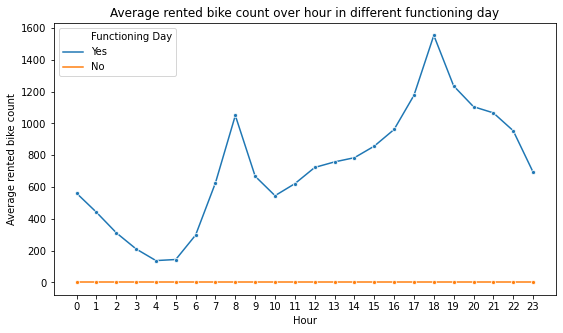

In [80]:
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', data = bikesharing, hue = 'Functioning Day', marker = 'o', markersize = 4, ci = None)
plt.title('Average rented bike count over hour in different functioning day')
plt.xlabel('Hour')
plt.ylabel('Average rented bike count')
plt.xticks(bikesharing['Hour'].unique())
plt.show()

Using line plot to visualize the average rented bike count over hours in different weekdays from 1st December 2017 to 30th November 2018.

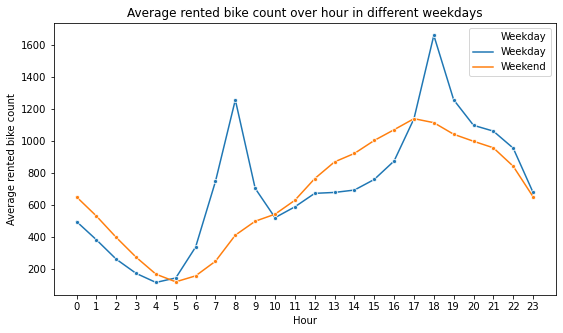

In [81]:
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', data = bikesharing, hue = 'Weekday', marker = 'o', markersize = 4, ci = None)
plt.title('Average rented bike count over hour in different weekdays')
plt.xlabel('Hour')
plt.ylabel('Average rented bike count')
plt.xticks(bikesharing['Hour'].unique())
plt.show()

### Question 3: What are the correlations between weather conditions (temperature, humidity, wind speed, visibility, solar radiation, rainfall, and snowfall), hour and the demand for shared bikes? 

Generate a table for correlation matrix by dropping the columns that are not numerical data and then generate the correlation matrix. 

In [82]:
bikesharing_mlr = bikesharing.drop(columns = {'Date', 'Seasons', 'Holiday', 'Functioning Day', 'Date (YY/MM/DD)', 'Year-Month', 'Year', 'Month', 'Day', 'Weekday'})
bikesharing_cm = bikesharing_mlr.corr()
bikesharing_cm

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


Visualize the correlation matrix heatmap using bikesharing_mlr table.

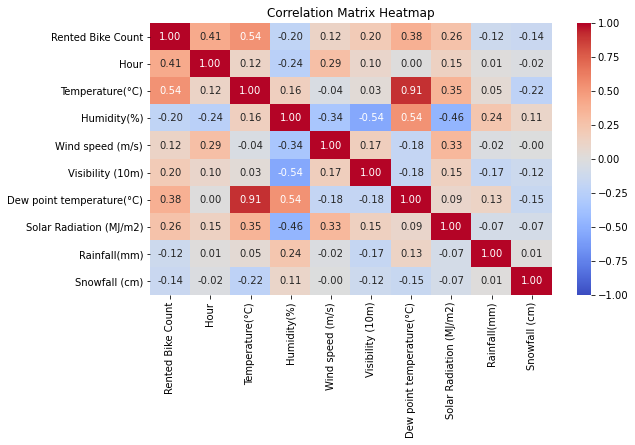

In [83]:
plt.figure(figsize = (9,5))
sns.heatmap(bikesharing_cm, annot = True, fmt = '.2f', cmap = 'coolwarm', vmax = 1, vmin = -1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Drop the column dew point temperature for multiple linear regression using table bikesharing_mlr.

In [84]:
bikesharing_mlr_final = bikesharing_mlr.drop(columns = 'Dew point temperature(°C)')
bikesharing_mlr_final

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0


Split the bikesharing_mlr_final into predictors X and response Y. 

In [85]:
X = bikesharing_mlr_final.drop(columns = 'Rented Bike Count')
Y = bikesharing_mlr_final['Rented Bike Count']

Split the dataset into an 80% training set and a 20% test set. Set the random state for reproducibility.

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Initialize the model and train the model by fitting the training set.

In [87]:
MLR = LinearRegression()
MLR.fit(X_train, Y_train)

LinearRegression()

Display the coefficient and intercept.

In [94]:
print('The coefficients are: ', ['{:.2f}'.format(coefficient) for coefficient in MLR.coef_])
print('The intercept is: ', '{:.2f}'.format(MLR.intercept_))

The coefficients are:  ['28.19', '31.44', '-7.20', '5.91', '0.02', '-81.70', '-61.42', '18.87']
The intercept is:  401.12


Make predictions on the test set.

In [95]:
Y_predict = MLR.predict(X_test)
Y_predict

array([ 988.10780021, 1167.30225656, 1417.92383695, ...,  777.87550772,
        -72.4319349 , 1370.02362755])

Evaluate the model using mean absolute error, mean square error and coefficient of determination (R-squared). Display them. 

In [98]:
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
R_square = MLR.score(X_test, Y_test)
print('The mean absolute error is: ', mae)
print('The mean square error is: ', mse)
print('The R square is: ', R_square)

The mean absolute error is:  349.4948086636376
The mean square error is:  222944.06221447847
The R square is:  0.46490801539292637


Visualize the residuals histogram.

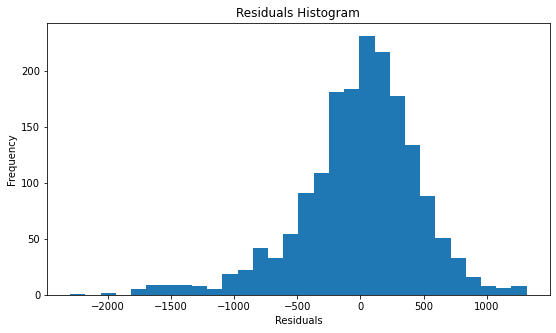

In [100]:
res = Y_predict - Y_test
plt.figure(figsize = (9,5))
plt.hist(res, bins = 30)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()